In [1]:
from sklearn.metrics import classification_report , confusion_matrix 
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data
names = ['age_patient', 'spectacle_prescription', 'astigmatic', 'tear_production_rate:  ', 'class']
data = pd.read_csv('lence1.csv',names=names)

In [3]:
data.head()

,age_patient,spectacle_prescription,astigmatic,tear_production_rate:,class
0,1,1,1,1,3
1,1,1,1,2,2
2,1,1,2,1,3
3,1,1,2,2,1
4,1,2,1,1,3


In [4]:
data.describe()

,age_patient,spectacle_prescription,astigmatic,tear_production_rate:,class
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.000000,1.500000,1.541667,1.500000,2.458333
std,0.834058,0.510754,0.508977,0.510754,0.779028
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,2.000000
50%,2.000000,1.500000,2.000000,1.500000,3.000000
75%,3.000000,2.000000,2.000000,2.000000,3.000000
max,3.000000,2.000000,2.000000,2.000000,3.000000


# Handling Categorical Variables

Using the map function

In [5]:
class_mapping = {1:'hard_contact_lenses',2:'soft_contact_lenses',3:'no_contact_lenses'}
data['class name'] = data['class'].map(class_mapping)

In [6]:
data.head()

,age_patient,spectacle_prescription,astigmatic,tear_production_rate:,class,class name
0,1,1,1,1,3,no_contact_lenses
1,1,1,1,2,2,soft_contact_lenses
2,1,1,2,1,3,no_contact_lenses
3,1,1,2,2,1,hard_contact_lenses
4,1,2,1,1,3,no_contact_lenses


In [7]:
#group by class statistics
data.groupby('class name').size()

class name
hard_contact_lenses     4
no_contact_lenses      15
soft_contact_lenses     5
dtype: int64

In [8]:
#check on missing value
def missing_value(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


missing_value(data)

,Total,Percent
class name,0,0.0
class,0,0.0
tear_production_rate:,0,0.0
astigmatic,0,0.0
spectacle_prescription,0,0.0
age_patient,0,0.0


In [9]:
#X Data
X = data.drop(['class','class name'], axis=1, inplace=False)
print('X Data is \n' , X.head())
print('X shape is ' , X.shape)

#y Data
y = data['class']
print('y Data is \n' , y.head())
print('y shape is ' , y.shape)


X Data is 
    age_patient  spectacle_prescription  astigmatic  tear_production_rate:  
0            1                       1           1                        1
1            1                       1           1                        2
2            1                       1           2                        1
3            1                       1           2                        2
4            1                       2           1                        1
X shape is  (24, 4)
y Data is 
 0    3
1    2
2    3
3    1
4    3
Name: class, dtype: int64
y shape is  (24,)


# Data Visualization

In [10]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Adjusting Style . .  :  
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn-notebook')

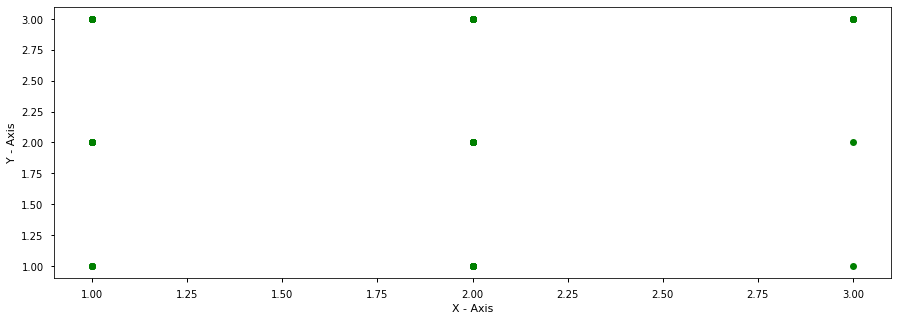

In [11]:
# Plot green dots using the argument "go"
plt.figure(figsize=(15,5))
plt.plot(X,y,'go')
plt.xlabel("X - Axis")
plt.ylabel("Y - Axis")
plt.show()

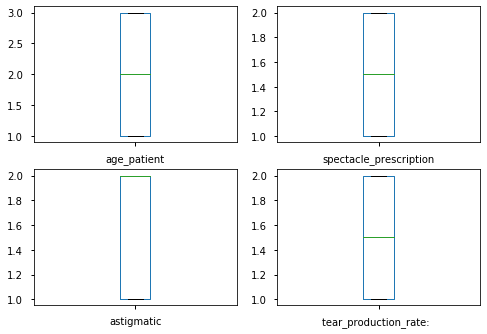

In [12]:
# box and whisker plots
X.plot(kind='box', subplots=True, layout=(2,2))
pyplot.show()

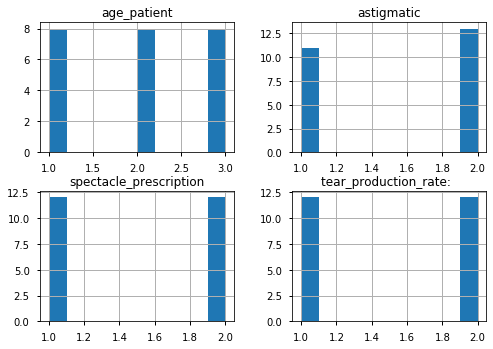

In [13]:
# histograms
X.hist()
pyplot.show()

# Standardization

In [14]:
from sklearn.preprocessing import StandardScaler
#----------------------------------------------------

#Standard Scaler for Data
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

# showing data
print('X \n' , X[:10])
print('y \n' , y[:10])


X 
 [[-1.22474487 -1.         -1.08711461 -1.        ]
 [-1.22474487 -1.         -1.08711461  1.        ]
 [-1.22474487 -1.          0.91986621 -1.        ]
 [-1.22474487 -1.          0.91986621  1.        ]
 [-1.22474487  1.         -1.08711461 -1.        ]
 [-1.22474487  1.         -1.08711461  1.        ]
 [-1.22474487  1.          0.91986621 -1.        ]
 [-1.22474487  1.          0.91986621  1.        ]
 [ 0.         -1.          0.91986621 -1.        ]
 [ 0.         -1.         -1.08711461  1.        ]]
y 
 0    3
1    2
2    3
3    1
4    3
5    2
6    3
7    1
8    3
9    2
Name: class, dtype: int64


# Splitting data

# Splitting data by train_test_split

In [15]:
#----------------------------------------------------
from sklearn.model_selection import train_test_split 
#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

 
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (16, 4)
X_test shape is  (8, 4)
y_train shape is  (16,)
y_test shape is  (8,)


In [32]:
#----------------------------------------------------
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#----------------------------------------------------
#Applying SVC Model 
SelectedModel = SVC(gamma='auto')
SelectedParameters = {'kernel':('linear', 'rbf','sigmoid'), 'C':[1,2,3,4,5]}
#=======================================================================
GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters, cv = 2,return_train_score=True)
GridSearchModel.fit(X_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]
#===============================================================================================================================
#Calculating Details
print('SVCModel Train Score is : ' , round(GridSearchModel.score(X_train, y_train)*100,2),'%')
print('SVCModel Test Score is : ' , round(GridSearchModel.score(X_test, y_test)*100,2),'%')
print('----------------------------------------------------')

# #Calculating Prediction
y_pred = GridSearchModel.predict(X_test)
print('Predicted Value for SVCModel is : ' , y_pred[:8])

SVCModel Train Score is :  93.75 %
SVCModel Test Score is :  87.5 %
----------------------------------------------------
Predicted Value for SVCModel is :  [3 1 1 2 3 2 3 3]


D:\New folder\anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Confusion Matrix is : 
 [[1 0 0]
 [0 2 0]
 [0 0 5]]


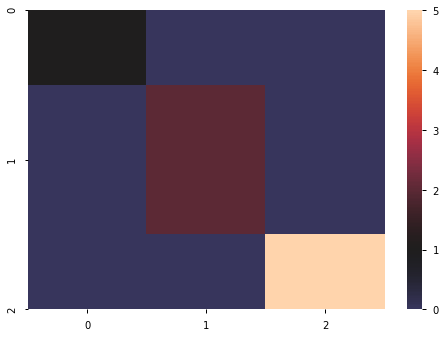

In [17]:
#Calculating Confusion Matrix
import pylab as pl
CM1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM1)

sns.heatmap(CM1, center = True)
plt.show()


In [18]:
# Classification Report
print('Classification Report SVM : ')
print(classification_report(y_test,y_pred))

Classification Report SVM : 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [19]:
#----------------------------------------------------
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
#----------------------------------------------------
from sklearn.metrics import accuracy_score
print('--'*40)
svm = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', svm,'%')
print('--'*40)

--------------------------------------------------------------------------------
Accuracy 100.0 %
--------------------------------------------------------------------------------


In [20]:
#----------------------------------------------------
from sklearn.neural_network import MLPClassifier
#----------------------------------------------------
#----------------------------------------------------Applying MLPClassifier Model---------------------------------------
 
SelectedModel2 = MLPClassifier(early_stopping= True, alpha=0.0001 ,hidden_layer_sizes=(100, 2),random_state=44)

SelectedParameters2 = {'solver':('lbfgs', 'sgd','adam'), 
                       'activation':('identity', 'logistic','relu'),
                      'learning_rate':('constant', 'invscaling','adaptive')}
#-----------------------------------------------------------------------------------------------------------------------
GridSearchModel2 = GridSearchCV(SelectedModel2,SelectedParameters2, cv = 2,return_train_score=True)
GridSearchModel2.fit(X_train, y_train)
sorted(GridSearchModel2.cv_results_.keys())
GridSearchResults2 = pd.DataFrame(GridSearchModel2.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]
#---------------------------------------------------------------------------------------------------------------------------------
#Calculating Details
print('MLPClassifierModel Train Score is : ' , round(GridSearchModel2.score(X_train, y_train)*100,2),'%')
print('MLPClassifierModel Test Score is : ' , round(GridSearchModel2.score(X_test, y_test)*100,2),'%')
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = GridSearchModel2.predict(X_test) 

MLPClassifierModel Train Score is :  93.75 %
MLPClassifierModel Test Score is :  87.5 %


D:\New folder\anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
#----------------------------------------------------
#Calculating Confusion Matrix
import pylab as pl
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)


Confusion Matrix is : 
 [[1 0 0]
 [0 2 0]
 [1 0 4]]


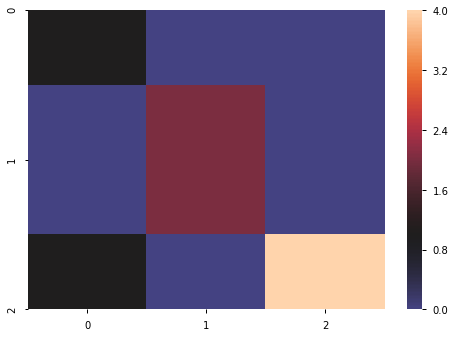

In [22]:
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [23]:
# Classification Report
print('Classification Report ANN : ')
print(classification_report(y_test,y_pred))


Classification Report ANN : 
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         2
           3       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.83      0.93      0.85         8
weighted avg       0.94      0.88      0.89         8



In [24]:
#---------------------------------------------------------------------
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
# --------------------------------------------------------------------
from sklearn.metrics import accuracy_score
print('--'*40)
ANN = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy  :: ANN ', ANN,'  || SVM ' ,svm,'%')
print('--'*40)

--------------------------------------------------------------------------------
Accuracy  :: ANN  87.5   || SVM  100.0 %
--------------------------------------------------------------------------------


Text(0.5, 1.0, 'Plotting comparing accuracies')

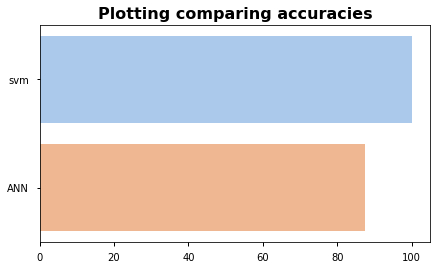

In [25]:
#comparing accuracies
plt.figure(figsize= (7,4))
ac = [svm,ANN]
name = ['svm','ANN']
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting comparing accuracies", fontsize=16, fontweight="bold")